In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

### First, importing the iris dataset

In [31]:
# Import dataset
from sklearn import datasets
iris_data = datasets.load_iris()
iris = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris['target'] = iris_data.target
# Map the targets of the iris dataset to target names
target_names = {
    0:'setosa',
    1:'versicolor', 
    2:'virginica'
}
iris['Species'] = iris['target'].map(target_names)

It is named iris_df, which can be seen below.

In [32]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


We can see that there are 4 covariates (sepal length, sepal width, petal length, petal width).

Then, we divide the whole dataset into three different subsets among the species of the iris.

In [33]:
setosa = iris[iris["Species"] == "setosa"].iloc[:,0:4]
versicolor = iris[iris["Species"] == "versicolor"].iloc[:,0:4]
virginica = iris[iris["Species"] == "virginica"].iloc[:,0:4]

Here's a corr matrix of iris.

In [40]:
X=iris.iloc[:,0:4]
corr = X.corr()
corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


To visualize this matrix:

<Axes: >

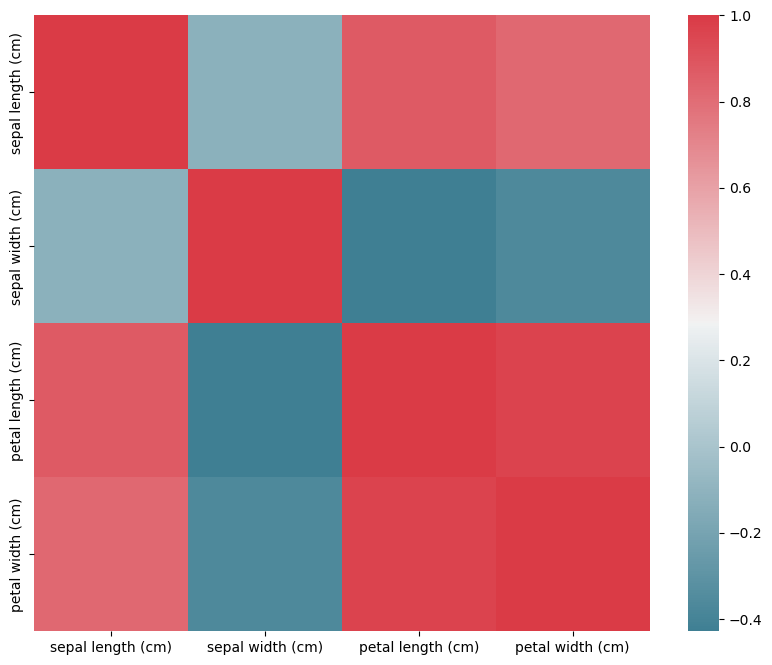

In [41]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax)

In [53]:
del iris["target"]
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


/Users/qiaomaimiwang/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


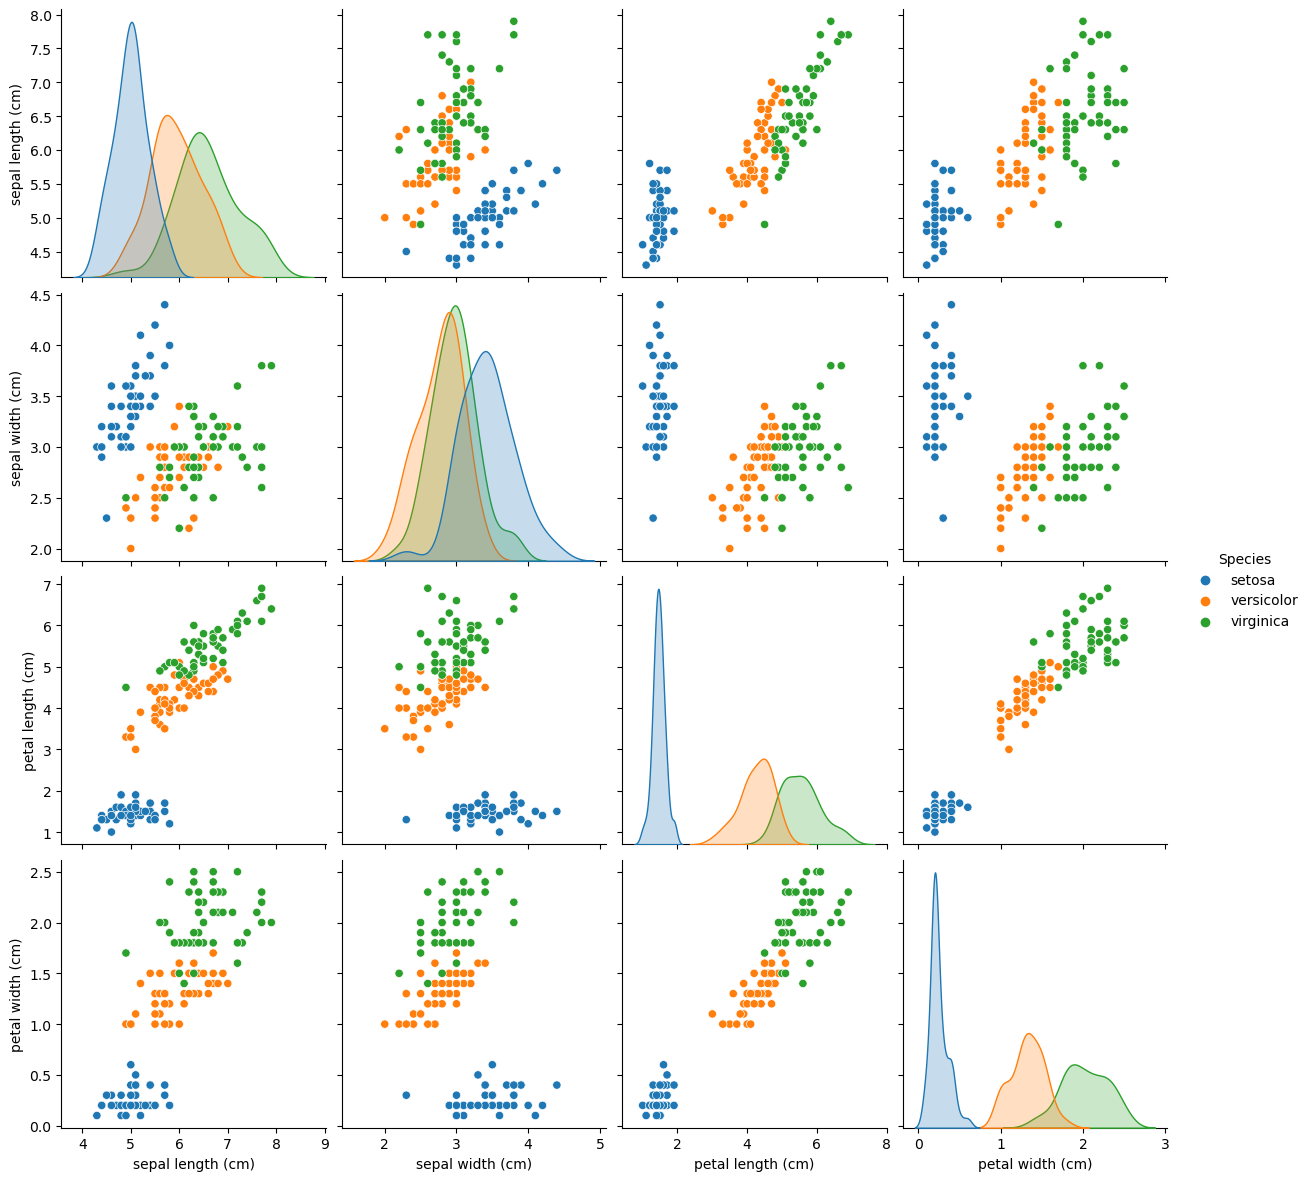

In [54]:
sns.pairplot(iris, hue="Species", height=3)

In [35]:

# fig, ax = plt.subplots()
# setosa_plot = ax.scatter(x=setosa["sepal length (cm)"], y=setosa["sepal width (cm)"], c="#91BC6B", label="setosa")
# versicolor_plot = ax.scatter(x=versicolor["sepal length (cm)"], y=versicolor["sepal width (cm)"], c="#FAC64F", label="versicolor")
# virginica_plot = ax.scatter(x=virginica["sepal length (cm)"], y=virginica["sepal width (cm)"], c="#557591", label="virginical")
# ax.set_xlabel("sepal length (cm)")
# ax.set_ylabel("sepal width (cm)")
# ax.set_title("iris dataset")
# ax.legend()
# plt.show()
